In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Banking%20Subscription/bank-additional-full.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data=data.rename(columns={'y':'subscription'})

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscription      0
dtype: int64

In [7]:
data.select_dtypes(include='number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')

In [8]:
data.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscription'], dtype='object')

In [9]:
data.apply(pd.Series.nunique, axis = 0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
subscription         2
dtype: int64

In [10]:
def uniqueDataView(data,col):
    count=0
    res_dct = {col[i]: data[col[i]].unique() for i in range(len(col))}
    for key in res_dct:
        count=count+1
        print(count, ".",key, ' : ', list(res_dct[key]))
        print()
uniqueDataView(data,list(data.columns.difference(['euribor3m','age','duration'])))

1 . campaign  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]

2 . cons.conf.idx  :  [-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33.0, -34.8, -34.6, -40.0, -39.8, -40.3, -38.3, -37.5, -49.5, -50.8]

3 . cons.price.idx  :  [93.994, 94.465, 93.918, 93.444, 93.798, 93.2, 92.756, 92.843, 93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649, 92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199, 94.601, 94.767]

4 . contact  :  ['telephone', 'cellular']

5 . day_of_week  :  ['mon', 'tue', 'wed', 'thu', 'fri']

6 . default  :  ['no', 'unknown', 'yes']

7 . education  :  ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']

8 . emp.var.rate  :  [1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0, -1.7, -1.1]

9 . housing  :  ['no',

In [11]:
round((data.isin([999]).sum()/data.shape[0])*100,2)

age                0.00
job                0.00
marital            0.00
education          0.00
default            0.00
housing            0.00
loan               0.00
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays             96.32
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscription       0.00
dtype: float64

In [12]:
data=data.drop('pdays',axis=1)
round((data.isin(['unknown']).sum()/data.shape[0])*100,2)

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.87
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscription       0.00
dtype: float64

In [13]:
def removeInvalidValues(dataset,invalidValue):
    for val in invalidValue:
        for y in dataset.columns:
            dataset.loc[:,y]=dataset.loc[:,y].drop(dataset[dataset[y]==val].index)
    return (round((data.isin(invalidValue).sum()/data.shape[0])*100,2))
removeInvalidValues(data,['unknown'])

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
subscription      0.0
dtype: float64

In [14]:
def dataView(data,col):
    count=0
    res = {col[i]: round(data[col[i]].value_counts(normalize=True),3).to_frame()for i in range(len(col))}
    for k,v in res.items():
        count=count+1
        print('\n--------------------------------------------------------------\n',count,'.',v)
dataView(data,list(data.columns.difference(['euribor3m','age','duration'])))


--------------------------------------------------------------
 1 .     campaign
1      0.428
2      0.257
3      0.130
4      0.064
5      0.039
6      0.024
7      0.015
8      0.010
9      0.007
10     0.005
11     0.004
12     0.003
13     0.002
14     0.002
17     0.001
16     0.001
15     0.001
18     0.001
20     0.001
19     0.001
21     0.001
22     0.000
23     0.000
24     0.000
27     0.000
29     0.000
28     0.000
26     0.000
25     0.000
31     0.000
30     0.000
35     0.000
32     0.000
33     0.000
34     0.000
42     0.000
40     0.000
43     0.000
56     0.000
39     0.000
41     0.000
37     0.000

--------------------------------------------------------------
 2 .        cons.conf.idx
-36.4          0.188
-42.7          0.162
-46.2          0.141
-36.1          0.126
-41.8          0.106
-42.0          0.088
-47.1          0.060
-31.4          0.019
-40.8          0.017
-26.9          0.011
-30.1          0.009
-40.3          0.008
-37.5          0.007
-50.0    

In [15]:
data.fillna(data.select_dtypes(include='number').median(), inplace=True)
data.fillna(data.select_dtypes(include='object').mode().iloc[0], inplace=True)
(100*data.isnull().sum()/len(data)).round(2)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
subscription      0.0
dtype: float64

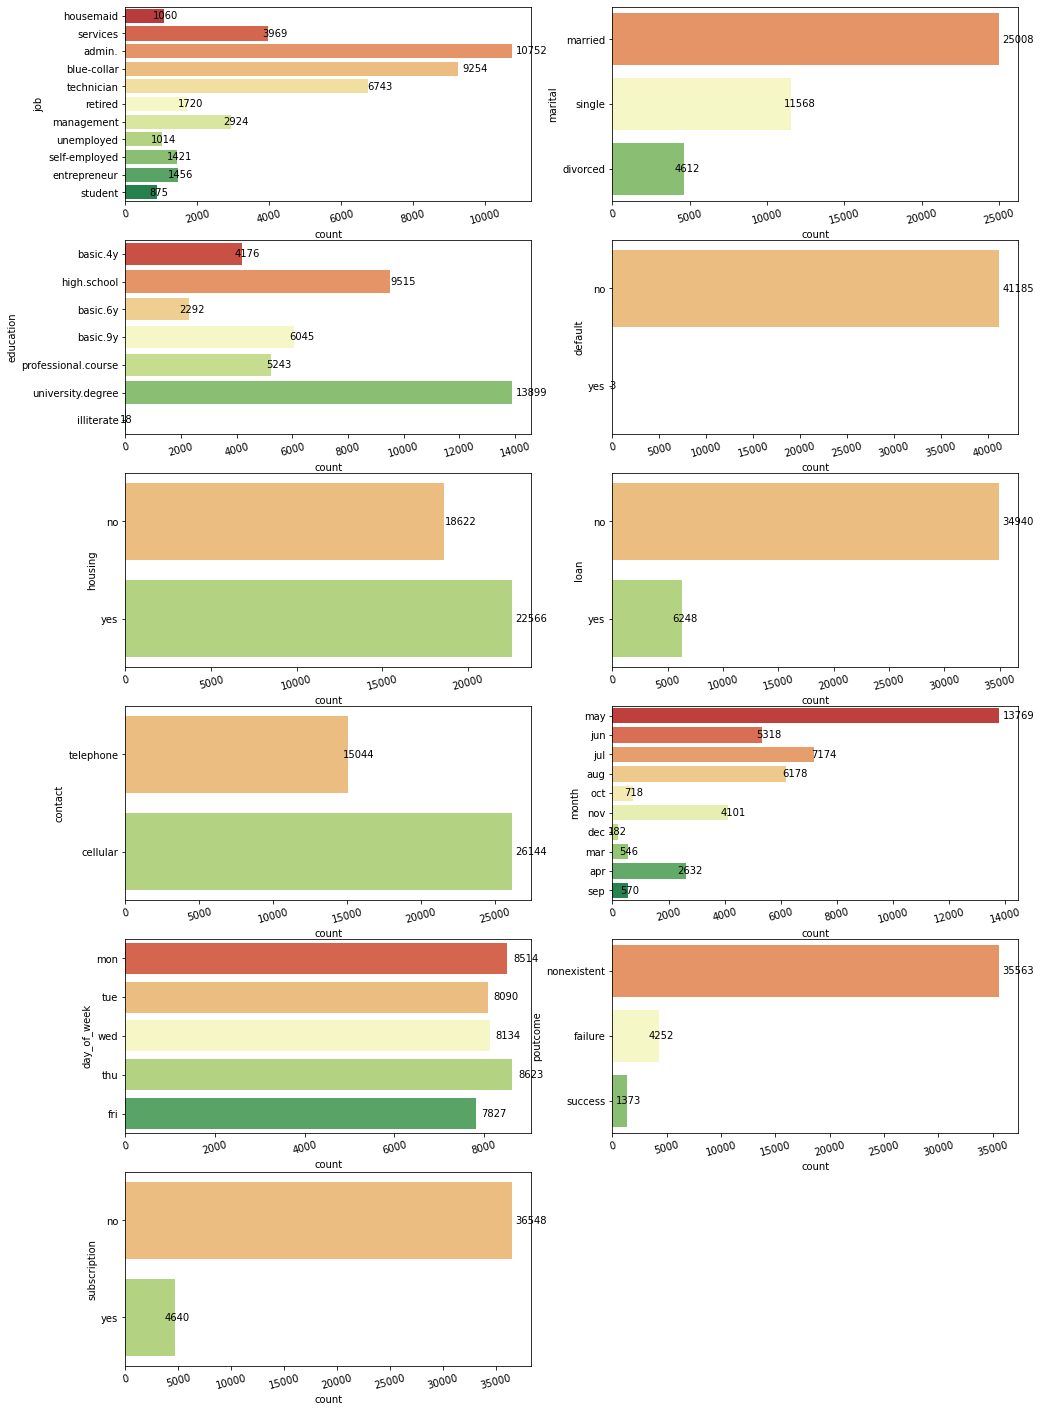

In [16]:
def categorical_analysis(cat_var,data):
    plt.figure(figsize=(16,25))
    for i in range(0,len(cat_var)):
        plt.subplot(6,2,i+1)
        ax=sns.countplot(y = cat_var[i], data = data,orient='v',palette='RdYlGn')
        plt.xticks(rotation=15)
        for rect in ax.patches:
            width = rect.get_width()
            plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='center', va='center')
    plt.show()
categorical_analysis(data.select_dtypes(include='object').columns,data)

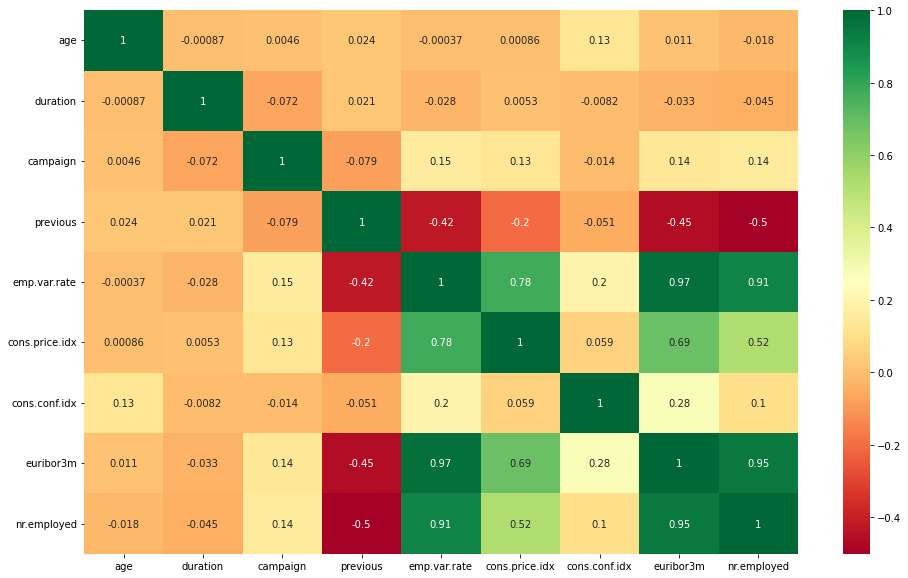

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

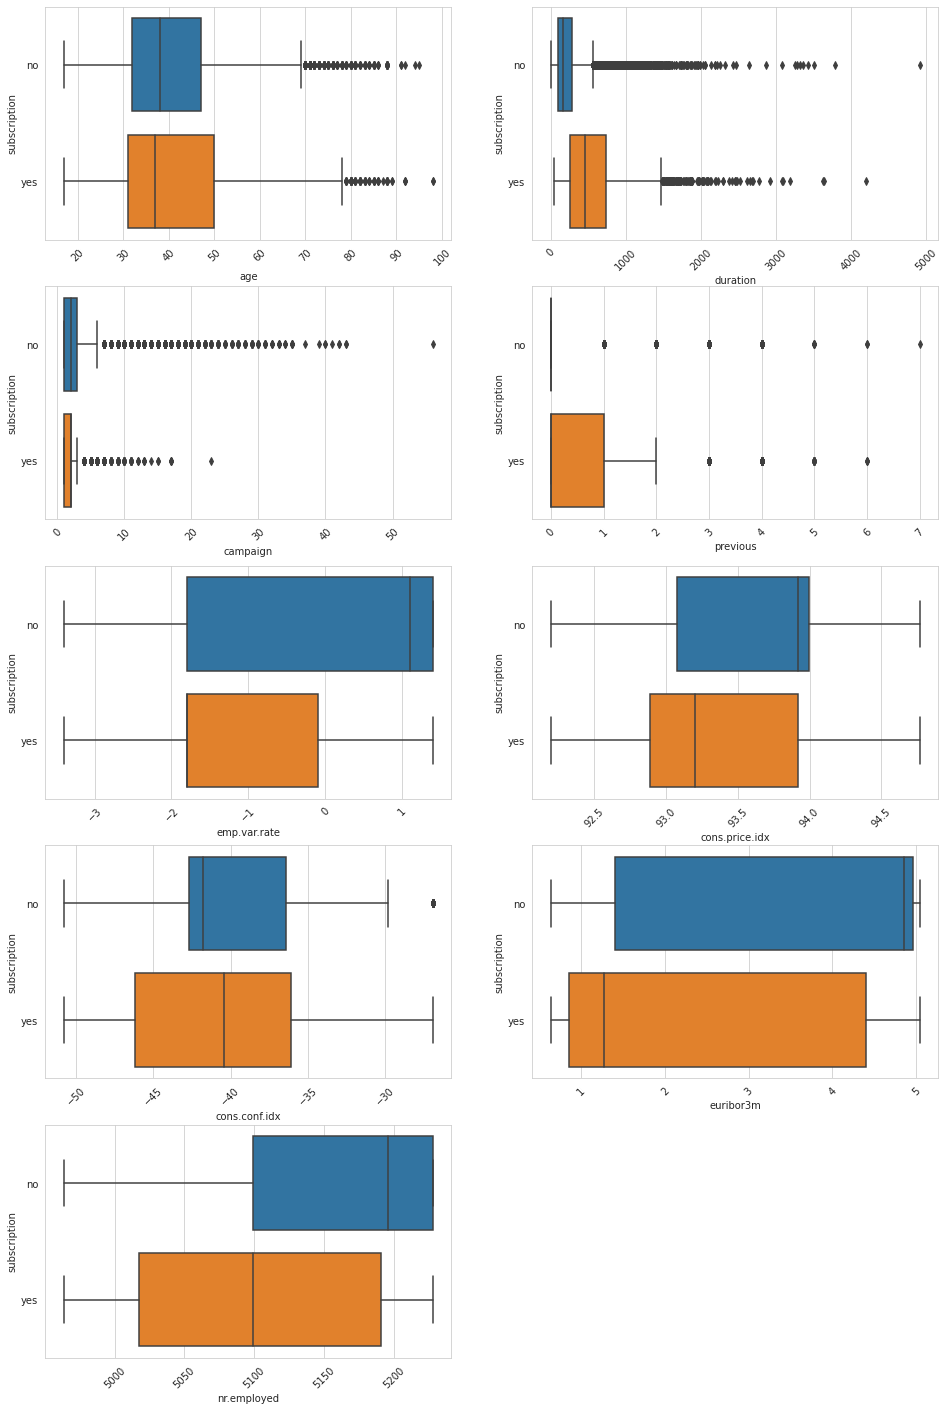

In [18]:
def categorical_analysis_box(cat_var,tar_var,data):
    plt.figure(figsize=(16, 30))
    for i in range(0,len(cat_var)):
        sns.set_style("whitegrid")
        plt.subplot(6,2,i+1)
        sns.boxplot(x = cat_var[i], y = tar_var, data = data)
        plt.xticks(rotation=45)
    plt.show()
categorical_analysis_box(data.select_dtypes(include='number').columns,'subscription',data)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

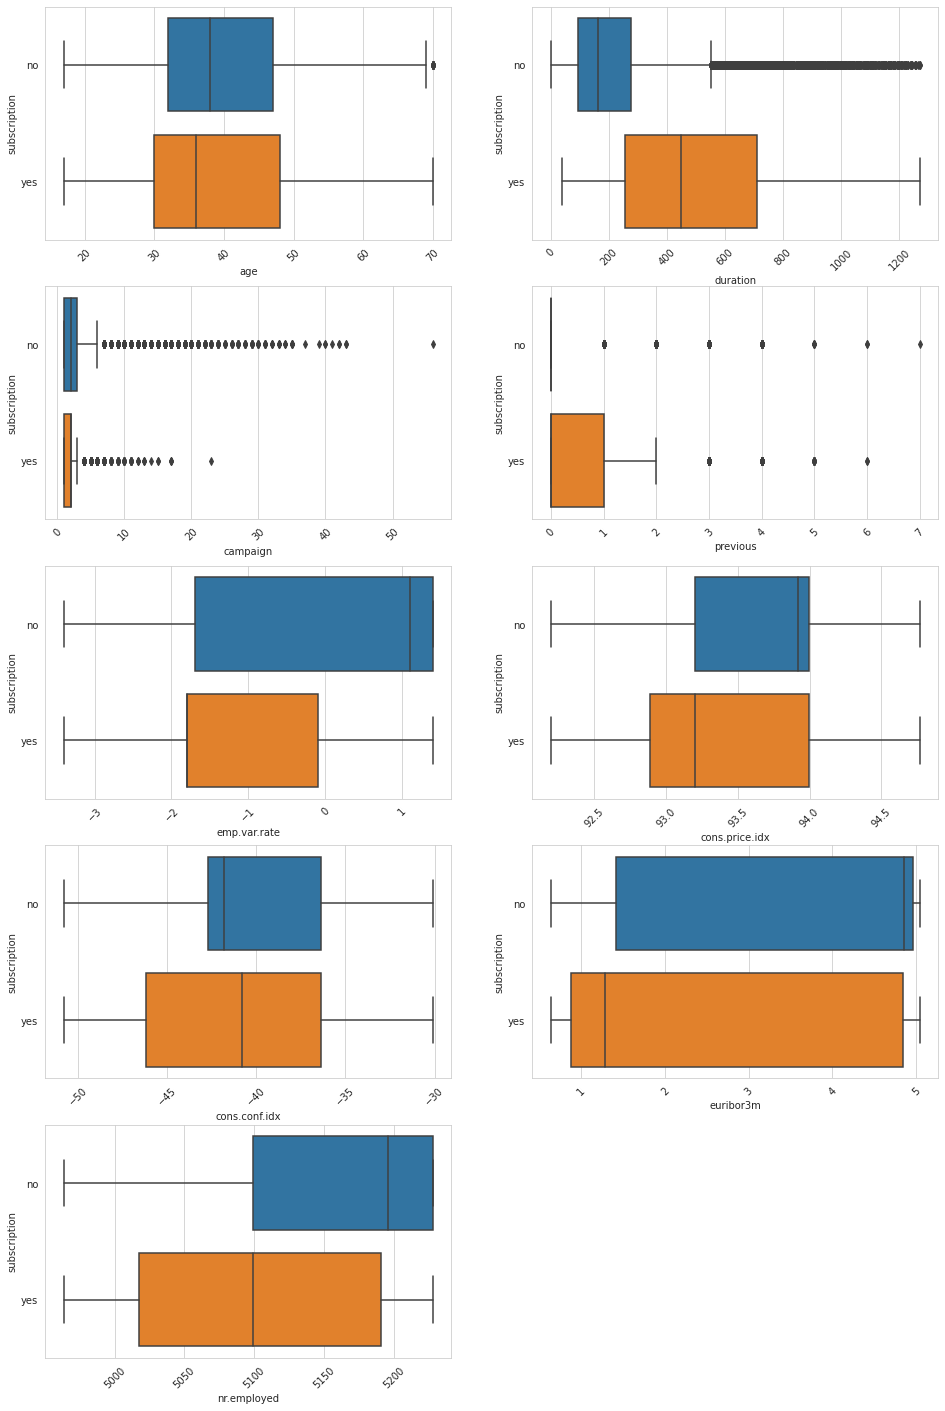

In [20]:
data=data[data['age']<np.nanpercentile(data['age'], 99)]
data=data[data['duration']<np.nanpercentile(data['duration'], 99)]
data=data[data['cons.conf.idx']<np.nanpercentile(data['cons.conf.idx'], 99)]
categorical_analysis_box(data.select_dtypes(include='number').columns,'subscription',data)

In [21]:
data = data.replace(to_replace = "yes", value = 1)
data = data.replace(to_replace = "no", value = 0)
def dummies(cols,data):
    for x in cols:
        t = pd.get_dummies(data[x], drop_first = True,prefix=x)
        data = pd.concat([data, t], axis = 1)
        data.drop([x], axis = 1, inplace = True)
    return data
data=dummies(data.select_dtypes(include='object').columns,data)
y=data['subscription']
X= data.drop('subscription',axis=1)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train :',X_train.shape,' y_train :',y_train.shape)
print('X_test :',X_test.shape, ' y_test :',y_test.shape)

X_train : (27807, 46)  y_train : (27807,)
X_test : (11918, 46)  y_test : (11918,)


In [23]:
scaler=StandardScaler()
cols=X_train.select_dtypes(include='number').columns
X_train[cols]=scaler.fit_transform(X_train[cols])
X_train .describe()

,age,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,...,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04
mean,1.239304e-17,3.832899e-19,1.910061e-17,-9.710010e-17,3.117424e-17,-3.832899e-18,1.660923e-17,-7.870218e-17,9.998116e-15,1.056858e-15,...,-7.154744e-18,-1.022106e-18,1.916449e-17,1.942002e-17,-5.468269e-17,-8.892325e-17,-3.628477e-17,9.761115e-17,1.768244e-16,4.803900e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-2.339160e+00,-5.996954e-03,-1.098672e+00,-4.226846e-01,-1.139021e+00,-5.630340e-01,-3.379754e-01,-2.375868e+00,-2.500946e+00,-2.328901e+00,...,-7.254982e-01,-3.360108e-01,-7.866118e-02,-8.250399e-02,-5.109122e-01,-5.151626e-01,-4.897286e-01,-5.003146e-01,-2.600157e+00,-1.740938e-01
25%,-7.799157e-01,-5.996954e-03,-1.098672e+00,-4.226846e-01,-6.671650e-01,-5.630340e-01,-3.379754e-01,-1.310039e+00,-9.377337e-01,-4.536609e-01,...,-7.254982e-01,-3.360108e-01,-7.866118e-02,-8.250399e-02,-5.109122e-01,-5.151626e-01,-4.897286e-01,-5.003146e-01,3.845922e-01,-1.740938e-01
50%,-1.562179e-01,-5.996954e-03,9.101898e-01,-4.226846e-01,-3.121052e-01,-2.079195e-01,-3.379754e-01,6.217768e-01,5.700332e-01,-2.453009e-01,...,-7.254982e-01,-3.360108e-01,-7.866118e-02,-8.250399e-02,-5.109122e-01,-5.151626e-01,-4.897286e-01,-5.003146e-01,3.845922e-01,-1.740938e-01
75%,7.793288e-01,-5.996954e-03,9.101898e-01,-4.226846e-01,3.185932e-01,1.471949e-01,-3.379754e-01,8.216198e-01,7.059647e-01,1.004859e+00,...,1.378363e+00,-3.360108e-01,-7.866118e-02,-8.250399e-02,-5.109122e-01,-5.151626e-01,-4.897286e-01,-5.003146e-01,3.845922e-01,-1.740938e-01
max,3.170170e+00,1.667513e+02,9.101898e-01,2.365830e+00,4.798888e+00,1.896826e+01,1.431382e+01,8.216198e-01,2.088531e+00,2.463380e+00,...,1.378363e+00,2.976095e+00,1.271275e+01,1.212063e+01,1.957284e+00,1.941135e+00,2.041947e+00,1.998742e+00,3.845922e-01,5.744031e+00


In [24]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           subscription   No. Observations:                27807
Model:                            GLM   Df Residuals:                    27760
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4986.2
Date:                Tue, 26 Apr 2022   Deviance:                       9972.4
Time:                        02:38:49   Pearson chi2:                 1.80e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2440
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.5330      0.639     -5.527      0.000      -4.786      -2.280
age                              -0.0202      0.032     -0.635      0.525      -0.082       0.042
default                          -0.0964    106.324     -0.001      0.999    -208.488     208.296
housing                           0.0142      0.027      0.529      0.597      -0.038       0.067
loan                              0.0196      0.027      0.740      0.459      -0.032       0.072
duration                          1.2627      0.023     53.846      0.000       1.217       1.309
campaign                         -0.1311      0.043     -3.031      0.002      -0.216      -0.046
previous                          0.0001      0.035      0.004      0.997      -0.068       0.068
emp.var.rate                     -2.9106      0.275    -10.573      0.000      -3.450      -2.371
cons.price.idx                    1.1161      0.179      6.250      0.000       0.766       1.466
cons.conf.idx                     0.1055      0.047      2.243      0.025       0.013       0.198
euribor3m                         0.9442      0.290      3.254      0.001       0.375       1.513
nr.employed                       0.1975      0.272      0.727      0.468      -0.335       0.730
job_blue-collar                  -0.1190      0.043     -2.792      0.005      -0.203      -0.035
job_entrepreneur                 -0.0468      0.031     -1.513      0.130      -0.107       0.014
job_housemaid                    -0.0299      0.033     -0.912      0.362      -0.094       0.034
job_management                   -0.0218      0.029     -0.760      0.447      -0.078       0.034
job_retired                       0.0150      0.027      0.555      0.579      -0.038       0.068
job_self-employed                -0.0311      0.028     -1.116      0.264      -0.086       0.024
job_services                     -0.0565      0.032     -1.741      0.082      -0.120       0.007
job_student                       0.0164      0.020      0.835      0.404      -0.022       0.055
job_technician                   -0.0114      0.034     -0.338      0.736      -0.078       0.055
job_unemployed                    0.0156      0.025      0.615      0.539      -0.034       0.065
marital_married                  -0.0075      0.045     -0.166      0.868      -0.096       0.081
marital_single                    0.0159      0.047      0.340      0.734      -0.076       0.107
education_basic.6y                0.0543      0.038      1.444      0.149      -0.019       0.128
education_basic.9y                0.0586      0.046      1.263      0.206      -0.032       0.150
education_high.school             0.0986      0.054      1.820      0.069      -0.008       0.205
education_illiterate             -0.0019     